### **Checking how much we can increase our dataset with the current scraping strategy**

In [1]:
import json
libraries = ["openai", "langchain", "cohere", "llamaindex", "guidance", "anthropic"]

print(
"""
Result Counts from Github (Collected Manually)
    openai: 71.7k
    langchain: 50.2k
    cohere: 5.1k
    guidance: 1.6k
    anthropic: 1.5k
    llamaindex: 91
"""
)

for lib in libraries:
    with open(f'../scraping/results_{lib}.json') as f:
        data = json.load(f)

    total_num_results = 0
    total_hrefs = 0

    for charCombo, results in data.items():
        num_result = results['num_results']
        hrefs = results['hrefs']

        # Convert num_result to int
        num_result = num_result.split()[0].replace(',', '')
        num_result = int(float(num_result[:-1])) if "k" in num_result else int(num_result)
        total_num_results += num_result

        # Count hrefs
        total_hrefs += len(hrefs)

    print(f'Library: {lib}')
    print('\tTotal number of results:', total_num_results)
    print('\tTotal number of hrefs:', total_hrefs)


Result Counts from Github (Collected Manually)
    openai: 71.7k
    langchain: 50.2k
    cohere: 5.1k
    guidance: 1.6k
    anthropic: 1.5k
    llamaindex: 91

Library: openai
	Total number of results: 33952
	Total number of hrefs: 18206
Library: langchain
	Total number of results: 28803
	Total number of hrefs: 16775
Library: cohere
	Total number of results: 5380
	Total number of hrefs: 4121
Library: llamaindex
	Total number of results: 91
	Total number of hrefs: 91
Library: guidance
	Total number of results: 1303
	Total number of hrefs: 1195
Library: anthropic
	Total number of results: 1401
	Total number of hrefs: 1328


### **Number of Missing Prompts**

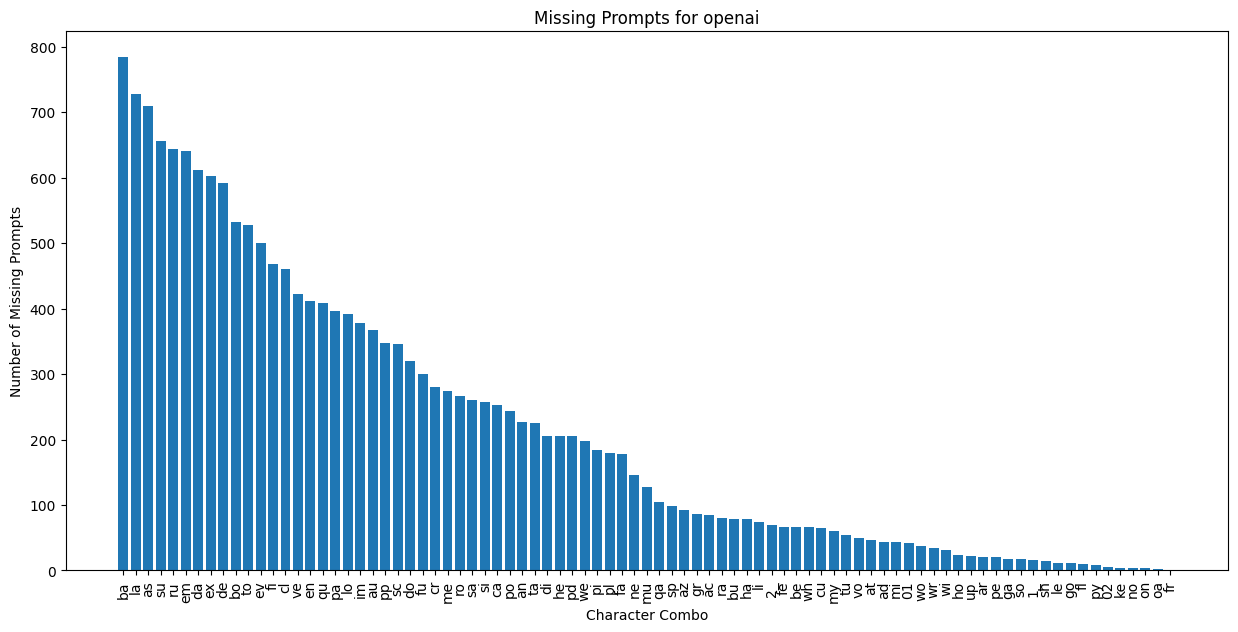

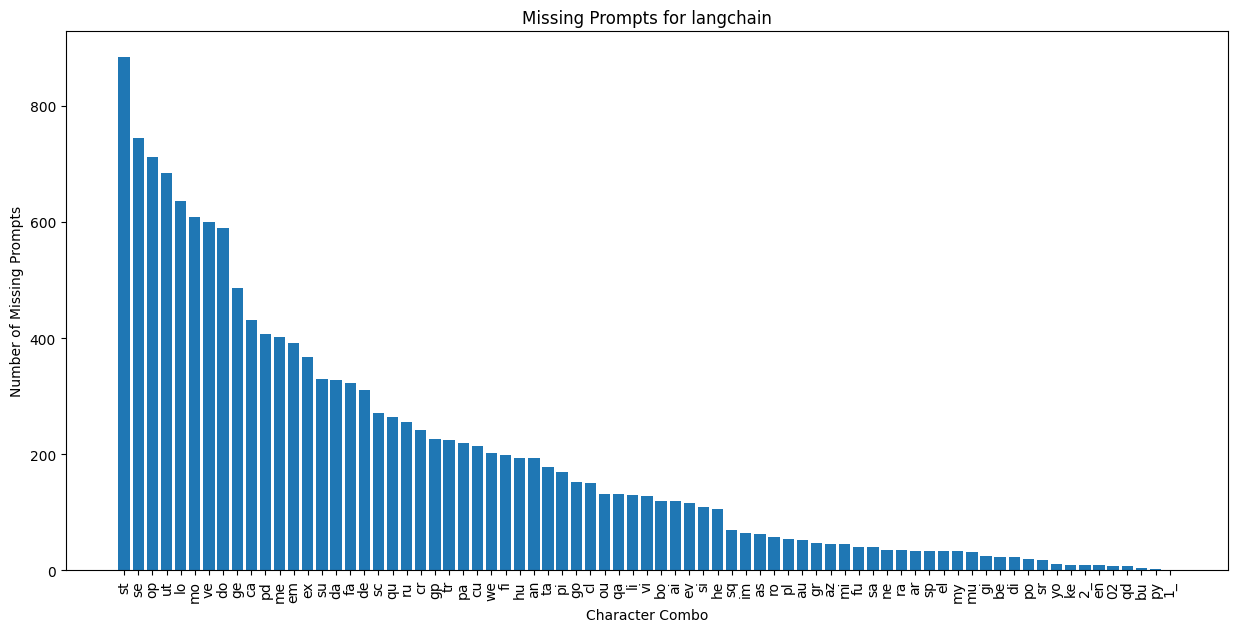

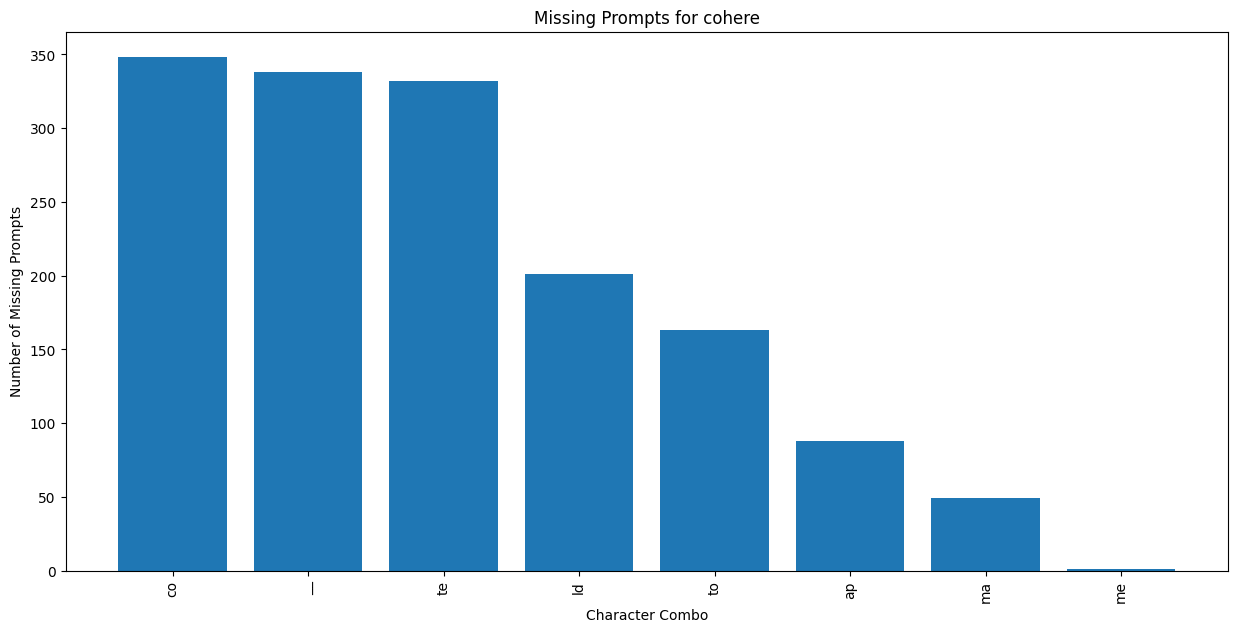

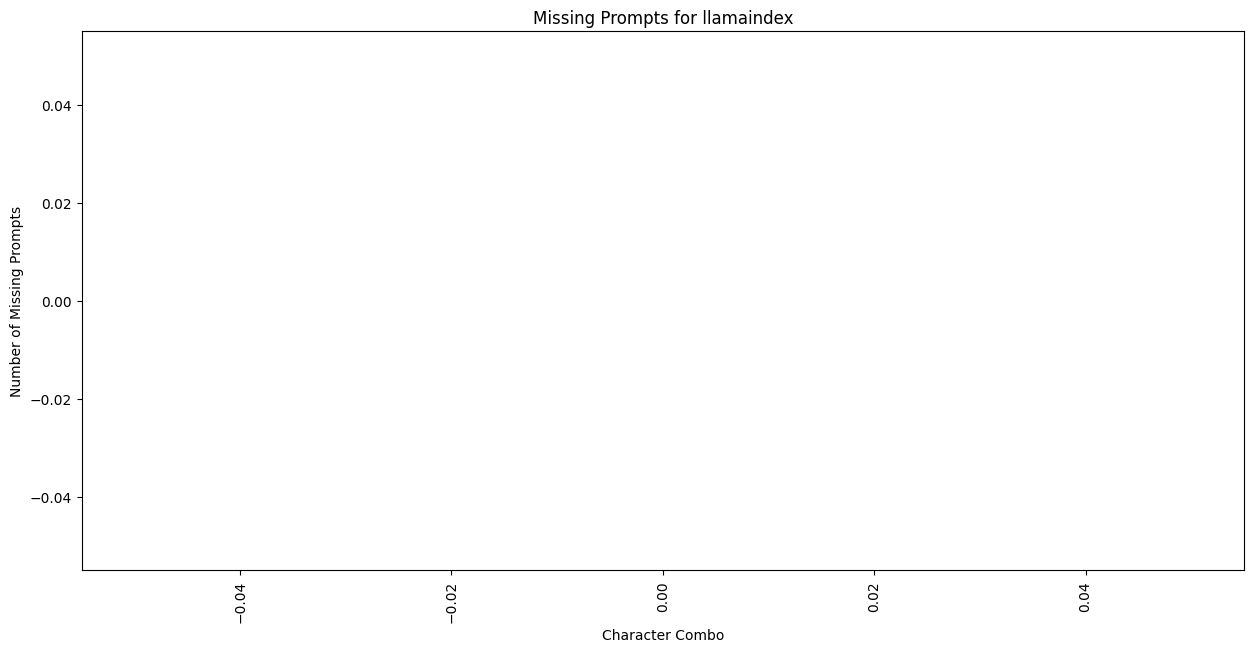

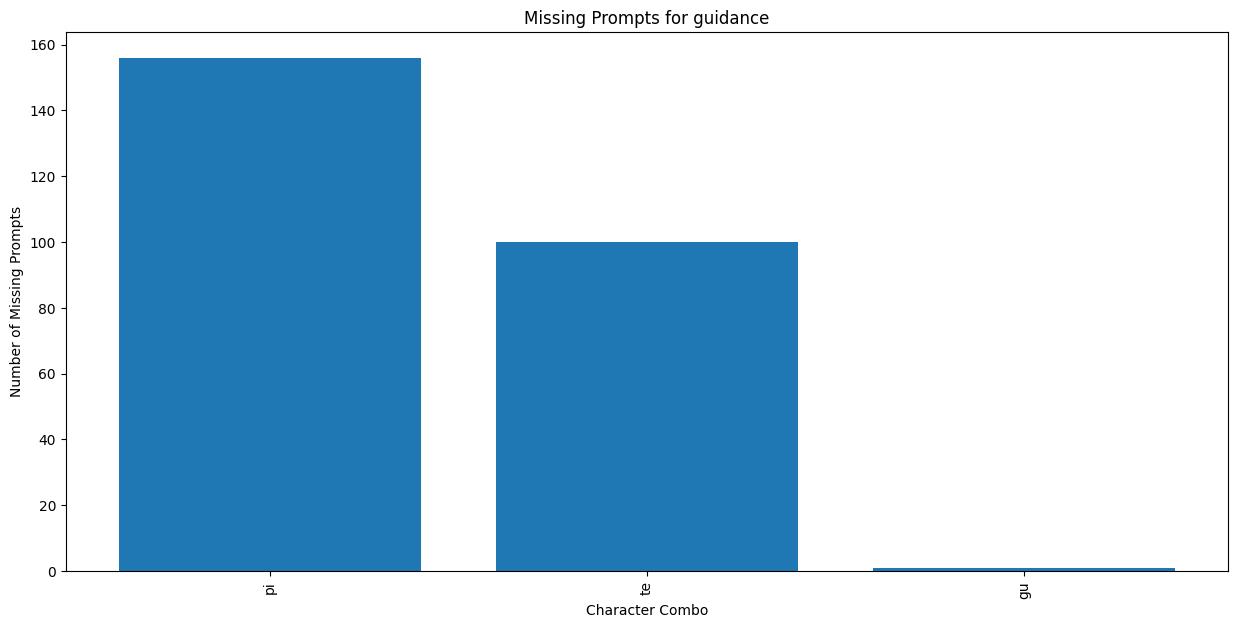

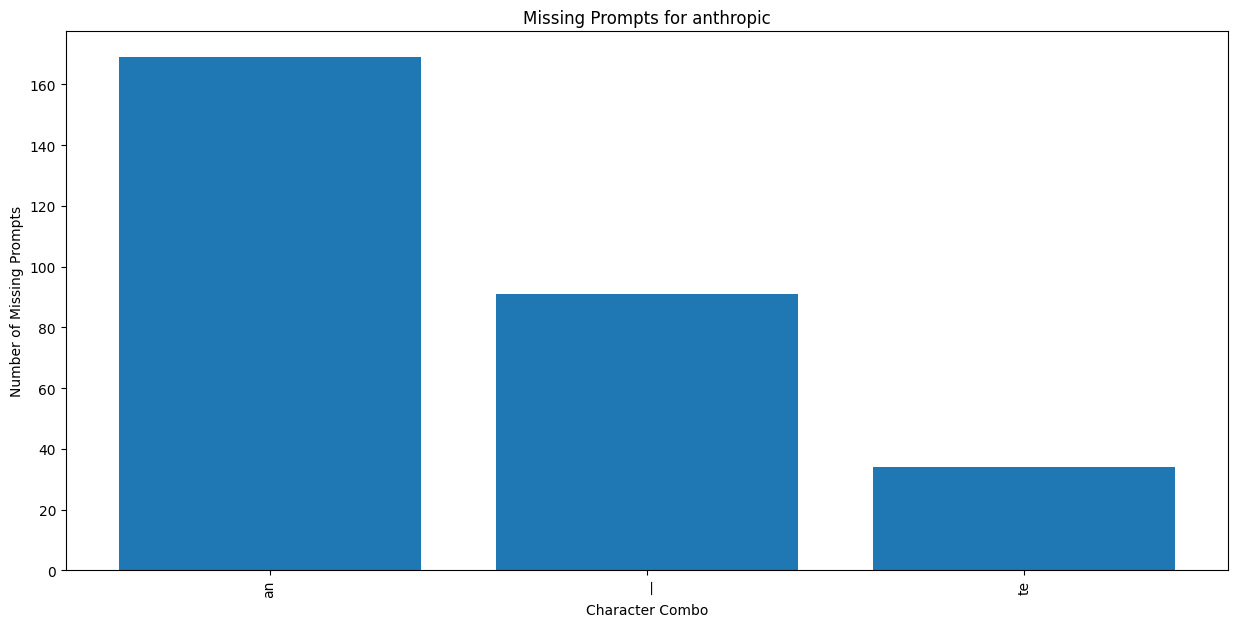


Overflow Count {'openai': 85, 'langchain': 75, 'cohere': 8, 'guidance': 3, 'anthropic': 3}


In [2]:
import matplotlib.pyplot as plt

overflow_count = {}
for lib in libraries:
    with open(f'../scraping/results_{lib}.json') as f:
        data = json.load(f)

    charCombo_overflow = {}
    for charCombo, results in data.items():
        num_result = results['num_results']
        hrefs = results['hrefs']

        # Convert num_result to int
        num_result = num_result.split()[0].replace(',', '')
        num_result = int(float(num_result[:-1])) if "k" in num_result else int(num_result)
        total_num_results += num_result

        # Check if there are less hrefs than num_results
        if len(hrefs) < num_result:
            overflow_count[lib] = overflow_count.get(lib, 0) + 1
            charCombo_overflow[charCombo] = charCombo_overflow.get(charCombo, 0) + (num_result - len(hrefs))
    
    charCombo_overflow = {k: v for k, v in sorted(charCombo_overflow.items(), key=lambda item: item[1], reverse=True)}
    
    # Graph charCombo_overflow for each lib
    plt.bar(charCombo_overflow.keys(), charCombo_overflow.values())
    plt.title(f'Missing Prompts for {lib}')
    plt.xlabel('Character Combo')
    plt.ylabel('Number of Missing Prompts')
    plt.xticks(rotation=90)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

print('\nOverflow Count', overflow_count)

### Checking Newly Scraped Data

In [4]:
import json
libraries = ["cohere", "guidance", "anthropic", "llamaindex", "langchain", "openai"]

print(
"""
Result Counts from Github (Collected Manually)
    guidance: 1.9k
    anthropic: 1.8k
    llamaindex: 117
    cohere: 6k
"""
)

for lib in libraries:
    with open(f'./results_{lib}.json') as f:
        data = json.load(f)
    
    # Delete the "~remaining_combinations~" key
    del data["~remaining_combinations~"]

    total_num_results = 0
    total_hrefs = set()

    for charCombo, results in data.items():
        num_result = results['num_results']
        hrefs = results['hrefs']

        # Convert num_result to int
        total_num_results += num_result

        # Count hrefs
        total_hrefs.update(hrefs)

        # print("MISMATCH!!!", charCombo, num_result, len(hrefs)) if num_result != len(hrefs) and len(hrefs) < 100 else None
        # print(f'Character Combo: {charCombo}; {num_result}') if num_result > 100 else None

    print(f'Library: {lib}')
    print('\tTotal number of results:', total_num_results)
    print('\tTotal number of hrefs:', len(total_hrefs))


Result Counts from Github (Collected Manually)
    guidance: 1.9k
    anthropic: 1.8k
    llamaindex: 117
    cohere: 6k

Library: cohere
	Total number of results: 5414
	Total number of hrefs: 4635
Library: guidance
	Total number of results: 1582
	Total number of hrefs: 1259
Library: anthropic
	Total number of results: 1657
	Total number of hrefs: 1297
Library: llamaindex
	Total number of results: 116
	Total number of hrefs: 122
Library: langchain
	Total number of results: 1815
	Total number of hrefs: 1816
Library: openai
	Total number of results: 2178
	Total number of hrefs: 1064
